<a href="https://colab.research.google.com/github/templar137/AI_project/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost

     |████████████████████████████████| 69.2MB 75kB/s 


In [2]:
pip install xgboost

In [3]:
pip install pycaret

     |████████████████████████████████| 266kB 7.4MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 276kB 48.2MB/s 
     |████████████████████████████████| 1.7MB 46.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 256kB 58.7MB/s 
     |████████████████████████████████| 2.0MB 19.8MB/s 
     |████████████████████████████████| 112kB 72.7MB/s 
     |████████████████████████████████| 14.2MB 56.4MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 1.4MB 64.8MB/s 
     |████████████████████████████████| 6.8MB 54.6MB/s 
     |████████████████████████████████| 174kB 74.2MB/s 
     |████████████████████████████████| 81kB 12.6MB/s 
     |████████████████████████████████| 10.1MB 43.0MB/s 
     |████████████████████████████████| 1.1MB 52.1

In [4]:
import pandas as pd
import numpy as np
from pycaret.classification import *
from sklearn.metrics import log_loss

# 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import random

# 모델
from lightgbm import LGBMClassifier

# 시각화 툴
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

pd.options.mode.chained_assignment = None

In [5]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [128]:
x_train_path = '/content/train.csv'
y_train_path = '/content/train_label.csv'
x_test_path = '/content/test.csv'

x_train = pd.read_csv(x_train_path)
x_test = pd.read_csv(x_test_path)
y_train = pd.read_csv(y_train_path)

# 이메일당 라벨 부여하는 코드
for i in range(0, len(x_train.iloc[:, 1])):
    for j in range(0, len(y_train.iloc[:, 1])):
        if x_train.iloc[i, 0] == y_train.iloc[j, 0]:
            x_train.loc[i, 'diag_NM'] = y_train.iloc[j, 1]

In [129]:
x_train_org = pd.read_csv(x_train_path)
x_test_org = pd.read_csv(x_test_path)

In [140]:
x_test = pd.read_csv(x_test_path)

In [130]:

# 불필요한 컬럼 제거 작업
drop = ['EMAIL', 'summary_date', 'activity_class_5min','activity_met_1min', 'sleep_hr_5min', 'sleep_hypnogram_5min',
        'sleep_is_longest', 'sleep_rmssd_5min', 'timezone', 'sleep_total','sleep_temperature_trend_deviation', 
        'CONVERT(activity_class_5min USING utf8)','CONVERT(activity_met_1min USING utf8)', 'CONVERT(sleep_hr_5min USING utf8)',
        'CONVERT(sleep_hypnogram_5min USING utf8)','CONVERT(sleep_rmssd_5min USING utf8)']
x_train = x_train.drop(columns = drop)
test_email = x_test['EMAIL']
x_test = x_test.drop(columns = drop)

In [131]:
#activity_score_meet_daily_target
#sleep_period
#activity_inactiviy_alert
#activity_score_recovery_time
#=>위 추가 drop by feature selection


x_train = x_train.drop(columns = ['activity_average_met', 'activity_cal_active', 'activity_cal_total','activity_steps', 'activity_score',
                                    'activity_score_move_every_hour', 'activity_daily_movement','activity_met_min_high',
                                    'activity_score_stay_active', 'activity_total', 'activity_met_min_low','activity_medium',
                                    'activity_score_training_frequency','activity_steps', 'activity_score',
                                    'activity_score_training_volume','sleep_efficiency','sleep_duration','sleep_hr_lowest',
                                    'sleep_midpoint_time','sleep_awake','sleep_deep','sleep_rem','sleep_restless','sleep_temperature_delta',
                                    'sleep_score_total','sleep_score','activity_score_meet_daily_targets','sleep_period_id','activity_inactivity_alerts',
                                  'activity_score_recovery_time'])

x_test = x_test.drop(columns = ['activity_average_met', 'activity_cal_active', 'activity_cal_total','activity_steps', 'activity_score',
                                    'activity_score_move_every_hour', 'activity_daily_movement','activity_met_min_high',
                                    'activity_score_stay_active', 'activity_total', 'activity_met_min_low','activity_medium',
                                    'activity_score_training_frequency','activity_steps', 'activity_score',
                                    'activity_score_training_volume','sleep_efficiency','sleep_duration','sleep_hr_lowest',
                                    'sleep_midpoint_time','sleep_awake','sleep_deep','sleep_rem','sleep_restless','sleep_temperature_delta',
                                    'sleep_score_total','sleep_score','activity_score_meet_daily_targets','sleep_period_id','activity_inactivity_alerts',
                                  'activity_score_recovery_time'])

In [165]:
x_test

,activity_high,activity_inactive,activity_low,activity_met_min_inactive,activity_met_min_medium,activity_non_wear,activity_rest,sleep_breath_average,sleep_hr_average,sleep_light,sleep_midpoint_at_delta,sleep_onset_latency,sleep_rmssd,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_temperature_deviation
0,0.0,588.0,0.0,0.0,29.0,41.0,502.0,15.998712,69.541010,11047.0,26128.0,845.0,29.0,100.0,41.0,55.0,75.0,94.0,55.0,-0.346215
1,0.0,544.0,309.0,6.0,0.0,163.0,601.0,13.051701,60.901762,6212.0,-9575.0,1104.0,10.0,99.0,70.0,69.0,93.0,84.0,73.0,0.019516
2,2.0,559.0,236.0,12.0,154.0,14.0,439.0,13.045471,43.534256,13934.0,-5974.0,790.0,33.0,88.0,89.0,49.0,78.0,99.0,36.0,0.022043
3,0.0,671.0,212.0,6.0,0.0,171.0,709.0,16.474520,64.184992,12222.0,-3392.0,447.0,19.0,83.0,95.0,74.0,88.0,51.0,100.0,0.013762
4,0.0,767.0,479.0,6.0,0.0,0.0,506.0,16.299909,60.320205,7692.0,-12391.0,237.0,43.0,100.0,9.0,39.0,34.0,96.0,39.0,-0.110565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29087,20.0,513.0,420.0,7.0,238.0,115.0,566.0,13.792295,65.301817,7153.0,20056.0,829.0,10.0,100.0,78.0,78.0,73.0,54.0,25.0,0.063381
29088,6.0,853.0,217.0,9.0,397.0,0.0,506.0,14.549449,61.628376,11099.0,-5206.0,1612.0,29.0,72.0,100.0,62.0,20.0,99.0,70.0,-0.257062
29089,12.0,705.0,152.0,1.0,299.0,0.0,360.0,12.388876,59.341031,15752.0,12054.0,90.0,14.0,99.0,71.0,49.0,30.0,82.0,50.0,0.487908
29090,6.0,648.0,247.0,8.0,295.0,0.0,504.0,14.147157,42.814743,7121.0,33071.0,824.0,10.0,91.0,100.0,94.0,98.0,80.0,54.0,0.298931


In [ ]:
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = (x_test - np.mean(x_train)) / np.std(x_train)
x_train['diag_NM'] = diag

In [ ]:
from pycaret.classification import *
from sklearn.metrics import log_loss

In [132]:
# 시계열 자료 수치화 보조 함수
def sumsquare_exp(llist):
  sum = 0
  #j = 2
  for i in llist:
    sum += np.exp(i)
  return sum

In [133]:
# 시계열 자료 수치화 보조 함수
def sumsquare(llist):
  sum = 0
  j = 3
  for i in llist:
    sum = sum + i ** j # i 의 j제곱
  return sum

In [134]:
def interpolate(x):
    temp = x.split('/')[:-1]
    temp = pd.to_numeric(temp)
    temp = pd.Series(temp).astype('float').replace(0., np.NaN).interpolate().tolist()
    temp = [x for x in temp if np.isnan(x) == False]
    return temp 

In [121]:
x_test_org = pd.read_csv(x_test_path)
x_train_org = pd.read_csv(x_train_path)

In [135]:
convert_low = ['CONVERT(activity_met_1min USING utf8)']
convert = ['CONVERT(sleep_hypnogram_5min USING utf8)']
#convert_high = ['CONVERT(sleep_rmssd_5min USING utf8)']
for i in convert_low:
  x_train_org.loc[:,i] = x_train_org[i].apply(interpolate)
  x_test_org.loc[:,i] = x_test_org[i].apply(interpolate)
  for j in range (0,len(x_train_org.iloc[:,1])):
    x_train.loc[j, 'new_' + i] = sumsquare_exp(x_train_org.loc[j,i]) / len(x_train_org.loc[j,i])
  for k in range (0,len(x_test_org.iloc[:,1])):
    x_test.loc[k, 'new_' + i] = sumsquare_exp(x_test_org.loc[k,i]) / len(x_test_org.loc[k,i])
for i in convert:
  x_train_org.loc[:,i] = x_train_org[i].apply(interpolate)
  x_test_org.loc[:,i] = x_test_org[i].apply(interpolate)
  for j in range (0,len(x_train_org.iloc[:,1])):
    x_train.loc[j, 'new_' + i] = sumsquare(x_train_org.loc[j,i]) / len(x_train_org.loc[j,i])
  for k in range (0,len(x_test_org.iloc[:,1])):
    x_test.loc[k, 'new_' + i] = sumsquare(x_test_org.loc[k,i]) / len(x_test_org.loc[k,i])


"\nfor i in convert_high:\n  x_train_org.loc[:,i] = x_train_org[i].apply(interpolate)\n  x_test_org.loc[:,i] = x_test_org[i].apply(interpolate)\n  for j in range (0,len(x_train_org[i])):\n    x_train.loc[j, 'new_' + i] = sumsquare(x_train_org.loc[j,i]) / len(x_train_org.loc[j,i])\n    x_test.loc[j, 'new_' + i] = sumsquare(x_test_org.loc[j,i]) / len(x_test_org.loc[j,i])\n\nfor i in range (0,(len(active))):\n  save = active[i].split('/')\n  save = pd.to_numeric(save)\n  save_nonan = [x for x in save if np.isnan(x) == False]\n  x_train.loc[i,'new_actmet'] = sumsquare(save_nonan)/len(save_nonan)\n"

In [140]:
drop = ['sleep_score_latency', 'sleep_score_alignment', 'sleep_score_efficiency']

x_train = x_train.drop(columns = drop)
x_test = x_test.drop(columns = drop)

In [141]:
exp_mclf101 = setup(data=x_train, target='diag_NM', session_id=123, use_gpu=True)
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8418,0.9211,0.7710,0.8419,0.8366,0.6654,0.6733,6.120
lightgbm,Light Gradient Boosting Machine,0.8156,0.8995,0.7213,0.8172,0.8070,0.6017,0.6154,0.389
rf,Random Forest Classifier,0.7813,0.8887,0.6211,0.8018,0.7575,0.4933,0.5409,1.363
et,Extra Trees Classifier,0.7751,0.8998,0.6087,0.8124,0.7448,0.4670,0.5346,1.327
gbc,Gradient Boosting Classifier,0.7324,0.8136,0.5755,0.7375,0.6983,0.3742,0.4204,5.863
dt,Decision Tree Classifier,0.6760,0.6771,0.5893,0.6771,0.6762,0.3553,0.3555,0.105
lr,Logistic Regression,0.6467,0.6376,0.4115,0.5913,0.5356,0.0749,0.1404,2.796
lda,Linear Discriminant Analysis,0.6441,0.6654,0.4331,0.5969,0.5674,0.1166,0.1557,0.042
ridge,Ridge Classifier,0.6400,0.0000,0.3546,0.5773,0.5370,0.0491,0.0854,0.035
ada,Ada Boost Classifier,0.6327,0.6291,0.4907,0.6001,0.5998,0.1758,0.1883,0.472


In [142]:
cat = create_model('catboost')  # met
feature_importances = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value': abs(
    cat.feature_importances_)}).sort_values(by='Value', ascending=False)
feature_importances

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8530,0.9277,0.7772,0.8526,0.8507,0.6954,0.6975
1,0.8438,0.9335,0.7533,0.8442,0.8389,0.6684,0.6761
2,0.8178,0.9113,0.7301,0.8177,0.8110,0.6110,0.6205
3,0.8545,0.9235,0.8097,0.8535,0.8511,0.6976,0.7024
4,0.8392,0.9128,0.7479,0.8393,0.8347,0.6615,0.6671
5,0.8560,0.9226,0.8096,0.8560,0.8524,0.6990,0.7049
6,0.8270,0.9097,0.7641,0.8304,0.8168,0.6248,0.6435
7,0.8331,0.9258,0.7545,0.8338,0.8268,0.6440,0.6544
8,0.8497,0.9218,0.7695,0.8490,0.8449,0.6823,0.6894
9,0.8436,0.9226,0.7935,0.8429,0.8382,0.6696,0.6776


,Feature,Value
8,sleep_hr_average,11.424673
7,sleep_breath_average,9.832393
10,sleep_midpoint_at_delta,7.842636
12,sleep_rmssd,7.351169
2,activity_low,6.974849
15,sleep_score_rem,5.744562
14,sleep_score_disturbances,5.578301
4,activity_met_min_medium,5.418750
9,sleep_light,5.384265
6,activity_rest,4.598590


In [258]:
x_test_org = pd.read_csv(x_test_path)

In [72]:
exp_mclf101 = setup(data=x_train, target='diag_NM', session_id=123, use_gpu=True)
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8412,0.9221,0.7644,0.8421,0.8356,0.6629,0.6720,6.102
lightgbm,Light Gradient Boosting Machine,0.8133,0.8986,0.7159,0.8147,0.8042,0.5958,0.6100,0.390
rf,Random Forest Classifier,0.7843,0.8871,0.6218,0.8045,0.7612,0.5013,0.5481,1.366
et,Extra Trees Classifier,0.7760,0.8963,0.6051,0.8122,0.7460,0.4693,0.5358,1.337
gbc,Gradient Boosting Classifier,0.7342,0.8154,0.5797,0.7403,0.7019,0.3802,0.4249,6.071
dt,Decision Tree Classifier,0.6743,0.6760,0.5859,0.6762,0.6749,0.3526,0.3528,0.111
lda,Linear Discriminant Analysis,0.6438,0.6653,0.4340,0.5970,0.5680,0.1182,0.1563,0.044
lr,Logistic Regression,0.6437,0.6456,0.4075,0.5762,0.5415,0.0751,0.1253,2.840
ridge,Ridge Classifier,0.6402,0.0000,0.3563,0.5869,0.5382,0.0509,0.0872,0.036
ada,Ada Boost Classifier,0.6365,0.6273,0.4935,0.6040,0.6022,0.1794,0.1936,0.488


In [73]:
cat = create_model('catboost')  # met

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8361,0.9253,0.7339,0.8367,0.8305,0.6505,0.6587
1,0.8407,0.9339,0.7478,0.8393,0.8364,0.6649,0.6700
2,0.8224,0.9180,0.7259,0.8242,0.8149,0.6179,0.6301
3,0.8453,0.9191,0.8002,0.8446,0.8411,0.6767,0.6828
4,0.8407,0.9166,0.7553,0.8411,0.8364,0.6646,0.6705
5,0.8300,0.9190,0.7648,0.8289,0.8259,0.6438,0.6491
6,0.8346,0.9121,0.7710,0.8403,0.8250,0.6419,0.6614
7,0.8407,0.9273,0.7557,0.8409,0.8349,0.6613,0.6706
8,0.8574,0.9240,0.7871,0.8584,0.8527,0.6980,0.7065
9,0.8635,0.9256,0.8019,0.8664,0.8583,0.7093,0.7202


In [ ]:
from pycaret.utils import version
version()

'2.3.1'

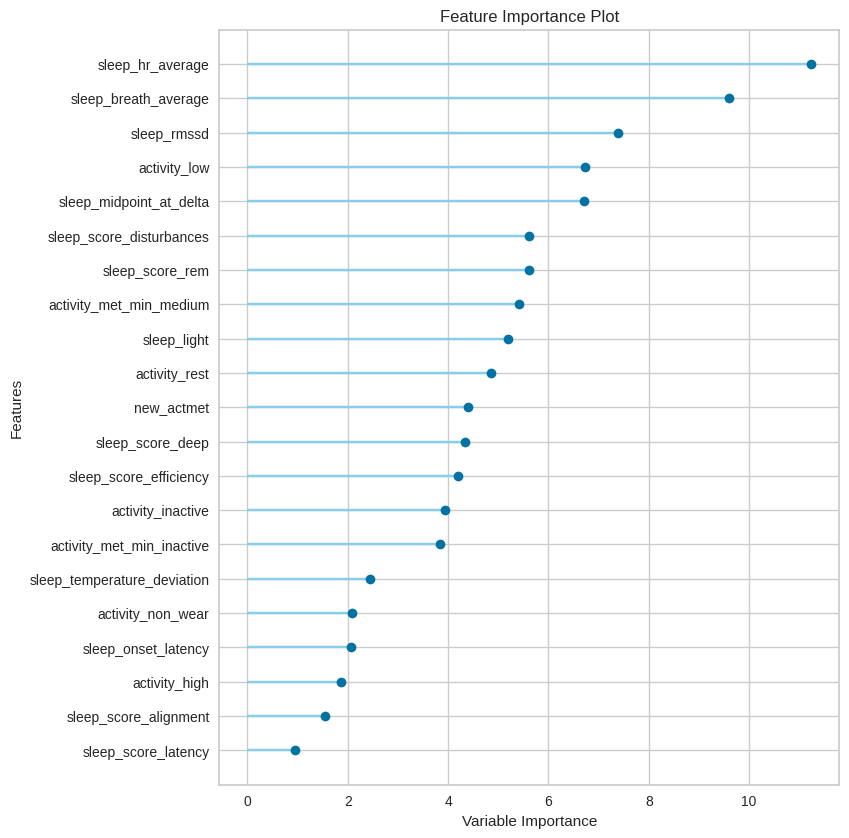

In [101]:
plot_model(cat, plot='feature_all')  ## met

In [129]:
sum(feature_importances['Value'])

100.00000000000001

In [ ]:
#feature_importances.to_csv('./content/feature_importances.csv', index=False)

In [144]:
test_csv = predict_model(cat, x_test)

In [145]:
test = test_csv['Label']

In [146]:
sub = pd.read_csv('/content/sample_submission.csv')

In [126]:
sub['DIAG_NM'][0]

'CN'

In [125]:
len(sub['ID'])

471

In [76]:
test_csv = pd.concat([test_email,test_csv],axis=1)

In [94]:
test_csv

,EMAIL,activity_high,activity_inactive,activity_low,activity_met_min_inactive,activity_met_min_medium,activity_non_wear,activity_rest,sleep_breath_average,sleep_hr_average,sleep_light,sleep_midpoint_at_delta,sleep_onset_latency,sleep_rmssd,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_temperature_deviation,new_actmet,Label,Score
0,nia+075@rowan.kr,0.0,588.0,0.0,0.0,29.0,41.0,502.0,15.998712,69.541010,11047.0,26128.0,845.0,29.0,100.0,41.0,55.0,75.0,94.0,55.0,-0.346215,10.984590,CN,0.9693
1,nia+075@rowan.kr,0.0,544.0,309.0,6.0,0.0,163.0,601.0,13.051701,60.901762,6212.0,-9575.0,1104.0,10.0,99.0,70.0,69.0,93.0,84.0,73.0,0.019516,10.279006,CN,0.9936
2,nia+075@rowan.kr,2.0,559.0,236.0,12.0,154.0,14.0,439.0,13.045471,43.534256,13934.0,-5974.0,790.0,33.0,88.0,89.0,49.0,78.0,99.0,36.0,0.022043,20.456586,CN,0.9691
3,nia+075@rowan.kr,0.0,671.0,212.0,6.0,0.0,171.0,709.0,16.474520,64.184992,12222.0,-3392.0,447.0,19.0,83.0,95.0,74.0,88.0,51.0,100.0,0.013762,8.462181,CN,0.8920
4,nia+075@rowan.kr,0.0,767.0,479.0,6.0,0.0,0.0,506.0,16.299909,60.320205,7692.0,-12391.0,237.0,43.0,100.0,9.0,39.0,34.0,96.0,39.0,-0.110565,10.836081,CN,0.9490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29087,nia+513@rowan.kr,20.0,513.0,420.0,7.0,238.0,115.0,566.0,13.792295,65.301817,7153.0,20056.0,829.0,10.0,100.0,78.0,78.0,73.0,54.0,25.0,0.063381,324.239460,MCI,0.5358
29088,nia+513@rowan.kr,6.0,853.0,217.0,9.0,397.0,0.0,506.0,14.549449,61.628376,11099.0,-5206.0,1612.0,29.0,72.0,100.0,62.0,20.0,99.0,70.0,-0.257062,48.853678,CN,0.9701
29089,nia+513@rowan.kr,12.0,705.0,152.0,1.0,299.0,0.0,360.0,12.388876,59.341031,15752.0,12054.0,90.0,14.0,99.0,71.0,49.0,30.0,82.0,50.0,0.487908,14.418539,CN,0.8814
29090,nia+513@rowan.kr,6.0,648.0,247.0,8.0,295.0,0.0,504.0,14.147157,42.814743,7121.0,33071.0,824.0,10.0,91.0,100.0,94.0,98.0,80.0,54.0,0.298931,155.955676,CN,0.9498


In [ ]:
test_csv['EMAIL'][0]

'nia+075@rowan.kr'

In [147]:
sub['DIAG_NM'] = 0

In [148]:
for j in range(0,len(sub['ID'])):
    for i in range(0,len(test_email)):
        if test_email[i] == sub['ID'][j]:
            sub['DIAG_NM'][j] = test[i]
            continue

In [149]:
sub

,ID,DIAG_NM
0,nia+075@rowan.kr,CN
1,nia+480@rowan.kr,CN
2,nia+157@rowan.kr,MCI
3,nia+601@rowan.kr,CN
4,nia+194@rowan.kr,CN
...,...,...
466,nia+310@rowan.kr,CN
467,nia+226@rowan.kr,CN
468,nia+563@rowan.kr,CN
469,nia+444@rowan.kr,CN


In [150]:
sub.to_csv('/content/predict_dropmodel_cat_delete_2_importance.csv', index=False)

In [ ]:
# 검증용
"""
stack = 0
for i in sub['DIAG_NM']:
    if i == 'CN':
        stack+=1
print(stack)